In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import functools as ft

In [2]:
co2_emission = pd.read_csv('../Data/Tanuj/co2_emissions_kt_by_country.csv')
city_temperature = pd.read_csv('../Data/Tanuj/city_temperature.csv')
power_plants = pd.read_csv('../Data/Tanuj/power_plants_data.csv')
power_plants_full = pd.read_csv('../Data/Tanuj/global_power_plant_database.csv', keep_default_na=False)

In [3]:
city_temperature

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,64.2
1,Africa,Algeria,Algiers,1,2,1995,49.4
2,Africa,Algeria,Algiers,1,3,1995,48.8
3,Africa,Algeria,Algiers,1,4,1995,46.4
4,Africa,Algeria,Algiers,1,5,1995,47.9
...,...,...,...,...,...,...,...
1048570,Middle East,Oman,Muscat,2,7,1999,-99.0
1048571,Middle East,Oman,Muscat,2,8,1999,-99.0
1048572,Middle East,Oman,Muscat,2,9,1999,-99.0
1048573,Middle East,Oman,Muscat,2,10,1999,-99.0


In [4]:
co2_emission.rename(columns = {'country_name':'Country'}, inplace = True)
co2_emission

,country_code,Country,year,value
0,ABW,Aruba,1960,11092.675000
1,ABW,Aruba,1961,11576.719000
2,ABW,Aruba,1962,12713.489000
3,ABW,Aruba,1963,12178.107000
4,ABW,Aruba,1964,11840.743000
...,...,...,...,...
13948,ZWE,Zimbabwe,2015,12430.000305
13949,ZWE,Zimbabwe,2016,11020.000458
13950,ZWE,Zimbabwe,2017,10340.000153
13951,ZWE,Zimbabwe,2018,12380.000114


In [5]:
power_plants.rename(columns = {'country_long':'Country', 'country':'country_code'}, inplace = True)
power_plants
# country_names = power_plants.country.unique()
# len(country_names)

,country_code,Country,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.3220,65.1190,Hydro
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.6700,65.7950,Solar
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.6230,65.7920,Solar
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.5560,69.4787,Hydro
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.6410,69.7170,Hydro
...,...,...,...,...,...,...,...,...
34931,ZMB,Zambia,Ndola,WRI1022386,50.0,-12.9667,28.6333,Oil
34932,ZMB,Zambia,Nkana,WRI1022384,20.0,-12.8167,28.2000,Oil
34933,ZMB,Zambia,Victoria Falls,WRI1022380,108.0,-17.9167,25.8500,Hydro
34934,ZWE,Zimbabwe,Hwange Coal Power Plant Zimbabwe,GEODB0040404,920.0,-18.3835,26.4700,Coal


In [6]:
power_plants_full.loc[power_plants_full['country_long'] == 'China']

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
5074,CHN,China,APP Zhenjiang Jindong Mill power station,WRI1075566,290.0,32.1944,119.6998,Coal,,,...,,,,,1413.08,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
5075,CHN,China,Aba Minjiang River Jiangseba,WRI1072501,128.0,31.4837,103.6032,Hydro,,,...,487.03,507.82,507.82,557.96,470.01,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
5076,CHN,China,Abag Banner Huiteng Liang Phase 1,WRI1072152,49.0,43.3500,115.9000,Wind,,,...,,,,,90.92,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
5077,CHN,China,Ahai,WRI1000457,4750.0,27.3488,100.5061,Hydro,,,...,11167.63,19482.09,14239.04,15846.43,15625.61,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
5078,CHN,China,Aksai A,WKS0070352,20.0,38.9690,94.4210,Solar,,,...,35.30,35.92,36.09,35.95,35.58,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9304,CHN,China,Zibo Hongda power station,WRI1075796,140.0,36.7833,118.0500,Coal,,,...,,,,,682.17,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
9305,CHN,China,Zipingpu,WRI1000497,760.0,31.0400,103.5700,Hydro,,,...,2617.64,3109.06,3109.06,3368.52,3109.06,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
9306,CHN,China,Ziqiang,WRI1072262,18.0,26.6661,106.1219,Hydro,,,...,59.09,78.02,81.28,84.30,81.01,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
9307,CHN,China,Zouxian power station,WRI1072548,4540.0,35.3256,116.9261,Coal,,,...,,,,,22122.01,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1


In [7]:
power_plant_count = power_plants['primary_fuel'].value_counts().reset_index().rename(columns={"index":"Primary Fuel", "primary_fuel":"Power Plants Count"})
power_plant_count

,Primary Fuel,Power Plants Count
0,Solar,10665
1,Hydro,7156
2,Wind,5344
3,Gas,3998
4,Coal,2330
5,Oil,2320
6,Biomass,1430
7,Waste,1068
8,Nuclear,195
9,Geothermal,189


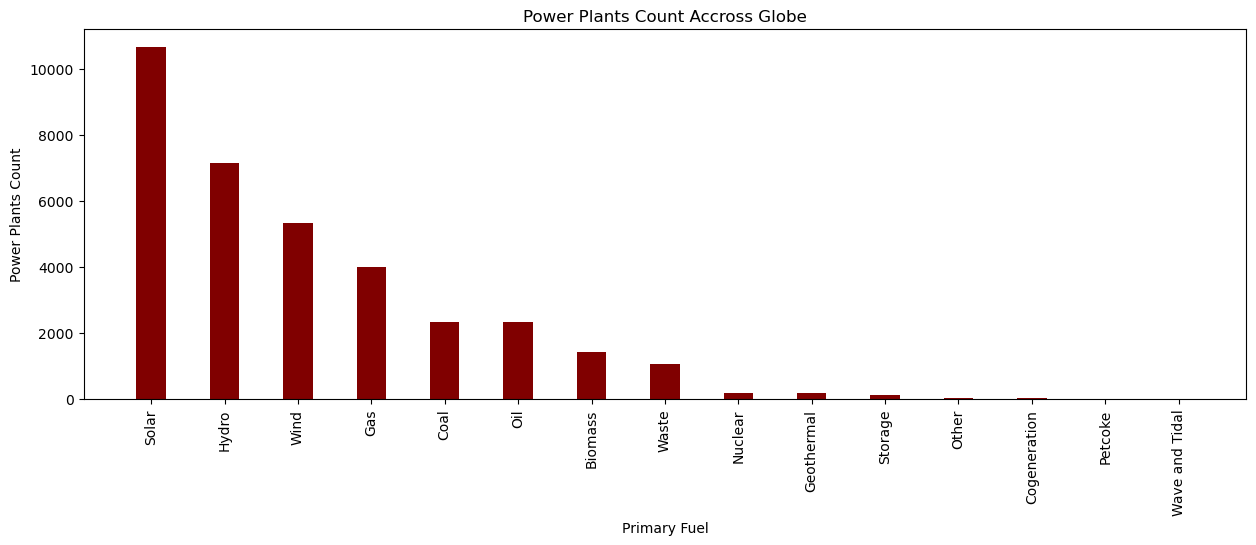

In [8]:
plt.figure().set_figwidth(15)
  
plt.bar(power_plant_count['Primary Fuel'].tolist(), power_plant_count['Power Plants Count'].tolist(), color ='maroon',
        width = 0.4)
  
# naming the x axis
plt.xlabel('Primary Fuel')
# naming the y axis
plt.ylabel('Power Plants Count')
# giving a title to my graph
plt.title('Power Plants Count Accross Globe')
plt.xticks(rotation='vertical')
plt.savefig('power_plants_count.png', bbox_inches='tight')
# function to show the plot
plt.show()

In [9]:
co2_country = pd.DataFrame(co2_emission.Country.unique(), columns=['Country'])
temp_country = pd.DataFrame(city_temperature.Country.unique(), columns=['Country'])
power_plants_country = pd.DataFrame(power_plants.Country.unique(), columns=['Country'])

# unique_country = pd.merge(pd.merge(co2_country, temp_country, on='Country'), power_plants_country, on='Country')
unique_country = ft.reduce(lambda left, right: pd.merge(left, right, on='Country', how='inner'), [co2_country, temp_country, power_plants_country])
unique_country

,Country
0,Albania
1,Australia
2,Austria
3,Burundi
4,Belgium
...,...
72,Ukraine
73,Uzbekistan
74,Vietnam
75,South Africa


In [10]:
co2_year = pd.DataFrame(co2_emission.year.unique(), columns=['Year'])
temp_year = pd.DataFrame(city_temperature.Year.unique(), columns=['Year'])

# unique_country = pd.merge(pd.merge(co2_country, temp_country, on='Country'), power_plants_country, on='Country')
unique_year = ft.reduce(lambda left, right: pd.merge(left, right, on='Year', how='inner'), [co2_year, temp_year])
unique_year

,Year
0,1995
1,1996
2,1997
3,1998
4,1999
5,2000
6,2001
7,2002
8,2003
9,2004


In [11]:
energy_generation_year = pd.DataFrame([2013, 2014, 2015, 2016, 2017], columns=['Year']);
energy_generation_year

,Year
0,2013
1,2014
2,2015
3,2016
4,2017


In [12]:
x = co2_emission['year'].isin(unique_year['Year'].tolist())
co2_emission = co2_emission[x]

In [13]:
y = city_temperature['Year'].isin(unique_year['Year'].tolist())
city_temperature = city_temperature[y]

In [14]:
# country_names = city_temperature.Country.unique()
# list(country_names)
# aggregate_temp = pd.DataFrame(columns = ['Country', 'AvgTemp'])
aggregate_temp = []
for country in unique_country['Country'].tolist():
    temp = []
    #aggregate_temp['Country'] = [country]
    #aggregate_temp.append({'Country' : country}, ignore_index = True)
    temp.append(country)
    temp.append(city_temperature.loc[city_temperature['Country'] == country].aggregate({"AvgTemperature": ['average']})['AvgTemperature'].iloc[0])
    #aggregate_temp['AvgTemp'] = [city_temperature.loc[city_temperature['Country'] == country].aggregate({"AvgTemperature": ['average']})['AvgTemperature'].iloc[0]]
    #aggregate_temp.append({"AvgTemp" : city_temperature.loc[city_temperature['Country'] == country].aggregate({"AvgTemperature": ['average']})['AvgTemperature'].iloc[0]}, ignore_index = True)
    aggregate_temp.append(temp)

aggregate_temp = pd.DataFrame(aggregate_temp, columns=['Country', 'AvgTemp'])
aggregate_temp

,Country,AvgTemp
0,Albania,32.908990
1,Australia,61.530372
2,Austria,51.137067
3,Burundi,-65.397138
4,Belgium,51.117816
...,...,...
72,Ukraine,47.756625
73,Uzbekistan,58.915199
74,Vietnam,74.795817
75,South Africa,61.865889


In [15]:
# country_names = co2_emission.country_name.unique()
# list(country_names)
# aggregate_temp = pd.DataFrame(columns = ['Country', 'AvgTemp'])
aggregate_emission = []
for country in unique_country['Country'].tolist():
    emission = []
    #aggregate_temp['Country'] = [country]
    #aggregate_temp.append({'Country' : country}, ignore_index = True)
    emission.append(country)
    emission.append(co2_emission.loc[co2_emission['Country'] == country].aggregate({"value": ['average']})['value'].iloc[0])
    #aggregate_temp['AvgTemp'] = [city_temperature.loc[city_temperature['Country'] == country].aggregate({"AvgTemperature": ['average']})['AvgTemperature'].iloc[0]]
    #aggregate_temp.append({"AvgTemp" : city_temperature.loc[city_temperature['Country'] == country].aggregate({"AvgTemperature": ['average']})['AvgTemperature'].iloc[0]}, ignore_index = True)
    aggregate_emission.append(emission)

aggregate_emission = pd.DataFrame(aggregate_emission, columns=['Country', 'AvgEmission'])
aggregate_emission

,Country,AvgEmission
0,Albania,3846.400003
1,Australia,362877.199316
2,Austria,67102.799872
3,Burundi,300.000002
4,Belgium,105837.599780
...,...,...
72,Ukraine,278304.401123
73,Uzbekistan,115990.800562
74,Vietnam,127070.799792
75,South Africa,374527.201416


In [16]:
co2_temp_data = pd.merge(aggregate_temp, aggregate_emission, how='inner', left_on='Country', right_on='Country')
co2_temp_data = co2_temp_data.sort_values(by=['Country'])
co2_temp_data

,Country,AvgTemp,AvgEmission
0,Albania,32.908990,3846.400003
16,Algeria,63.839389,111102.800049
1,Australia,61.530372,362877.199316
2,Austria,51.137067,67102.799872
8,Bahrain,80.758804,22713.199933
...,...,...,...
72,Ukraine,47.756625,278304.401123
22,United Kingdom,51.070713,482292.399707
73,Uzbekistan,58.915199,115990.800562
74,Vietnam,74.795817,127070.799792


In [38]:
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(data['value'].tolist())
    random_data_mean = np.mean(data['value'].tolist())
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
#     print(lower_limit)
    # Generate outliers
    for outlier in data.values.tolist():
        if outlier[3] > upper_limit or outlier[3] < lower_limit:
            anomalies.append(outlier)
    return anomalies

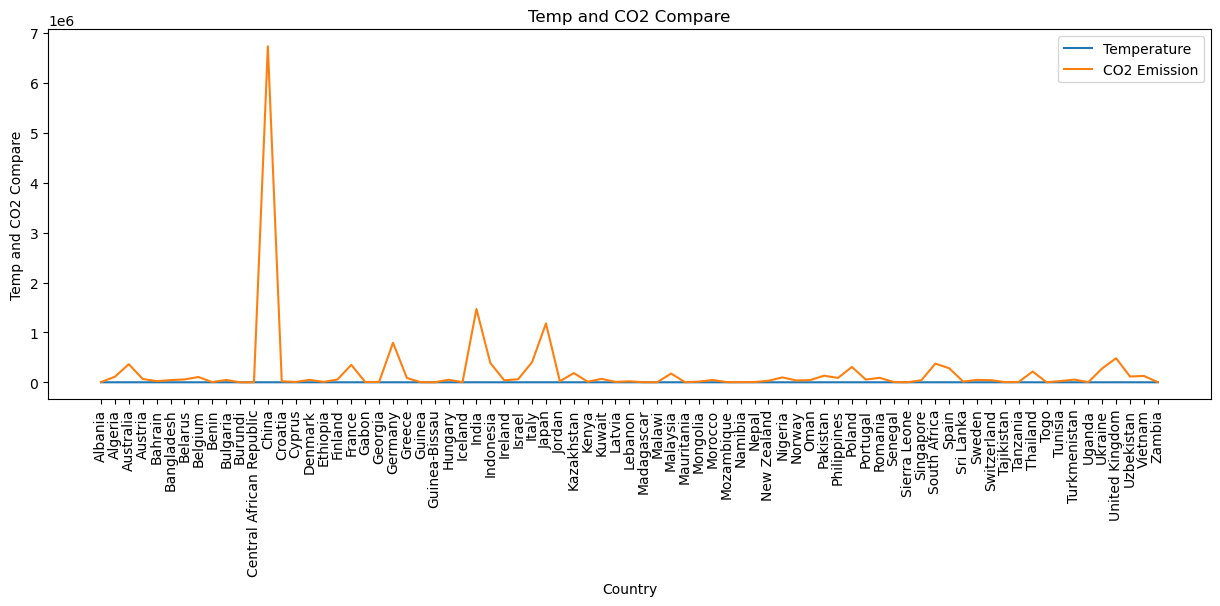

In [18]:
# line 1 points
x1 = co2_temp_data['Country'].tolist()
y1 = co2_temp_data['AvgTemp'].tolist()

plt.figure().set_figwidth(15)
# plotting the line 1 points 
plt.plot(x1, y1, label = "Temperature")
  
# line 2 points
x2 = co2_temp_data['Country'].tolist()
y2 = co2_temp_data['AvgEmission'].tolist()
# plotting the line 2 points 
plt.plot(x2, y2, label = "CO2 Emission")
  
# naming the x axis
plt.xlabel('Country')
# naming the y axis
plt.ylabel('Temp and CO2 Compare')
# giving a title to my graph
plt.title('Temp and CO2 Compare')
plt.xticks(rotation='vertical')
plt.savefig('temperature_co2_plot.png', bbox_inches='tight')
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()

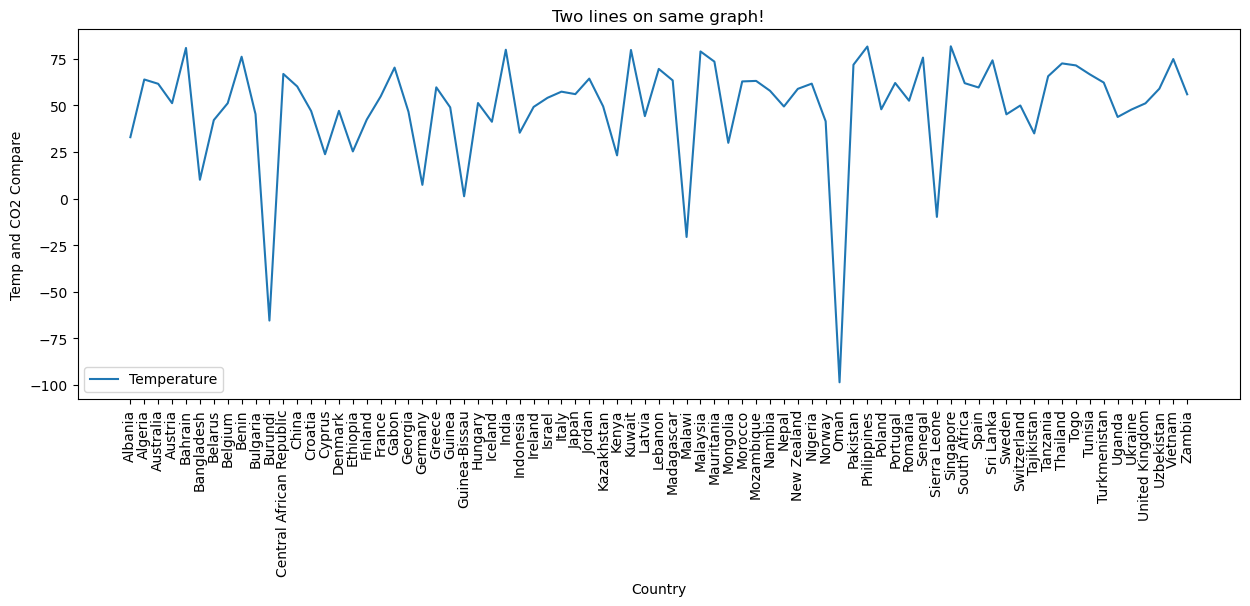

In [19]:
# line 1 points
x1 = co2_temp_data['Country'].tolist()
y1 = co2_temp_data['AvgTemp'].tolist()

plt.figure().set_figwidth(15)
# plotting the line 1 points 
plt.plot(x1, y1, label = "Temperature")
  
# # line 2 points
# x2 = co2_temp_data['Country'].tolist()
# y2 = np.log(co2_temp_data['AvgEmission'].tolist())
# # plotting the line 2 points 
# plt.plot(x2, y2, label = "CO2 Emission")
  
# naming the x axis
plt.xlabel('Country')
# naming the y axis
plt.ylabel('Temp and CO2 Compare')
# giving a title to my graph
plt.title('Two lines on same graph!')
plt.xticks(rotation='vertical')
plt.savefig('temperature_co2_plot_log.png', bbox_inches='tight')
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()

In [20]:
# find_anomalies(co2_temp_data)
# print(co2_temp_data.loc[co2_temp_data['Country'] == 'China']['AvgEmission'])

In [21]:
co2_temp_data_excluding_china= co2_temp_data.drop(co2_temp_data.index[(co2_temp_data["Country"]=="China")], axis=0)

In [22]:
# find_anomalies(co2_temp_data_excluding_china)

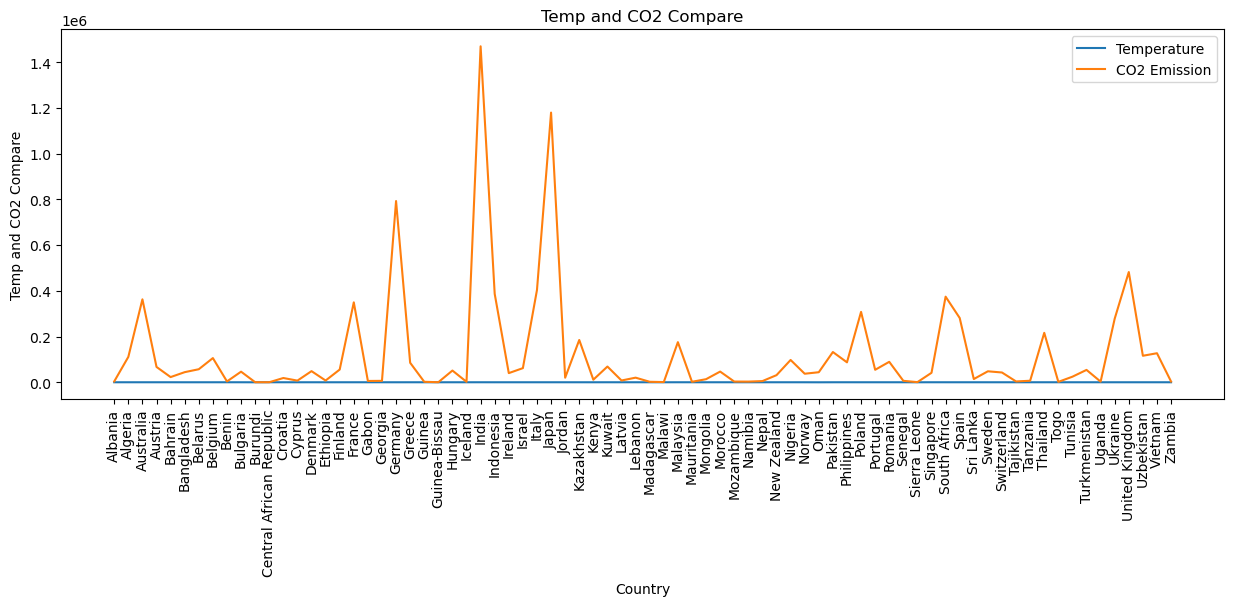

In [23]:
# line 1 points
x1 = co2_temp_data_excluding_china['Country'].tolist()
y1 = co2_temp_data_excluding_china['AvgTemp'].tolist()

plt.figure().set_figwidth(15)
# plotting the line 1 points 
plt.plot(x1, y1, label = "Temperature")
  
# line 2 points
x2 = co2_temp_data_excluding_china['Country'].tolist()
y2 = co2_temp_data_excluding_china['AvgEmission'].tolist()
# plotting the line 2 points 
plt.plot(x2, y2, label = "CO2 Emission")
  
# naming the x axis
plt.xlabel('Country')
# naming the y axis
plt.ylabel('Temp and CO2 Compare')
# giving a title to my graph
plt.title('Temp and CO2 Compare')
plt.xticks(rotation='vertical')
plt.savefig('temperature_co2_plot_excluding_china.png', bbox_inches='tight')
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()

In [24]:
china_power_plants = power_plants_full.loc[power_plants['Country'] == 'China']
china_power_plant_count = china_power_plants['primary_fuel'].value_counts().reset_index().rename(columns={"index":"Primary Fuel", "primary_fuel":"Power Plants Count"})
china_power_plant_count

,Primary Fuel,Power Plants Count
0,Solar,1318
1,Hydro,947
2,Coal,946
3,Wind,835
4,Gas,170
5,Nuclear,12
6,Oil,5
7,Geothermal,2


In [25]:
# city_temperature.loc[city_temperature['Country'] == 'China'].loc[city_temperature['Year'] == 1995]
aggregate_by_year = []
for year in unique_year['Year'].tolist():
    yearly_temp = []
    #aggregate_temp['Country'] = [country]
    #aggregate_temp.append({'Country' : country}, ignore_index = True)
    yearly_temp.append(year)
    yearly_temp.append(city_temperature.loc[city_temperature['Country'] == 'China'].loc[city_temperature['Year'] == year].aggregate({"AvgTemperature": ['average']})['AvgTemperature'].iloc[0])
    #aggregate_temp['AvgTemp'] = [city_temperature.loc[city_temperature['Country'] == country].aggregate({"AvgTemperature": ['average']})['AvgTemperature'].iloc[0]]
    #aggregate_temp.append({"AvgTemp" : city_temperature.loc[city_temperature['Country'] == country].aggregate({"AvgTemperature": ['average']})['AvgTemperature'].iloc[0]}, ignore_index = True)
    aggregate_by_year.append(yearly_temp)

aggregate_by_year = pd.DataFrame(aggregate_by_year, columns=['Year', 'AvgTemp'])
aggregate_by_year

,Year,AvgTemp
0,1995,59.772493
1,1996,59.088962
2,1997,58.282575
3,1998,59.950247
4,1999,60.312658
5,2000,60.078415
6,2001,60.306904
7,2002,58.874466
8,2003,60.476822
9,2004,60.931803


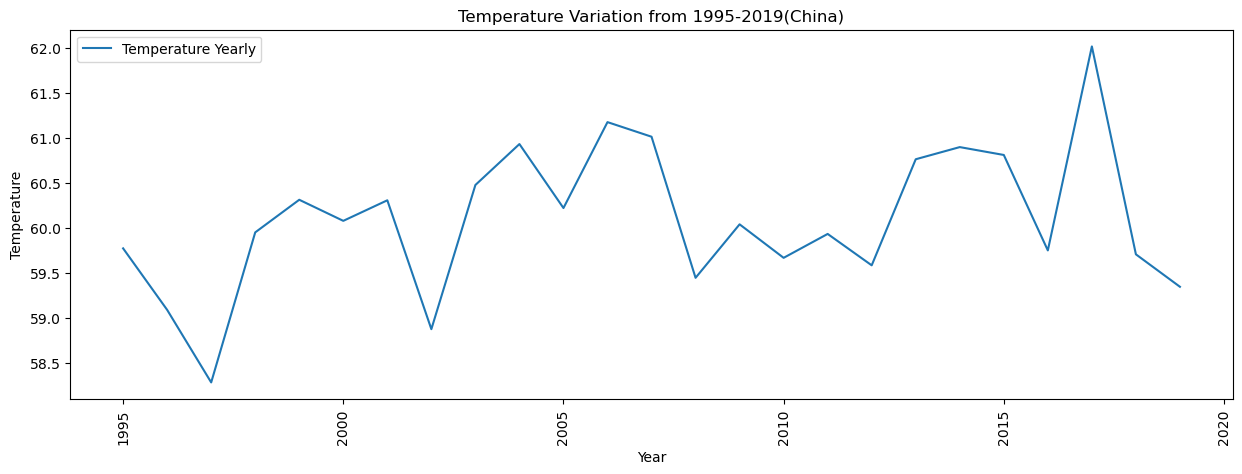

In [26]:
# line 1 points
x1 = aggregate_by_year['Year'].tolist()
y1 = aggregate_by_year['AvgTemp'].tolist()

plt.figure().set_figwidth(15)
# plotting the line 1 points 
plt.plot(x1, y1, label = "Temperature Yearly")
  
# naming the x axis
plt.xlabel('Year')
# naming the y axis
plt.ylabel('Temperature')
# giving a title to my graph
plt.title("Temperature Variation from 1995-2019(China)")
plt.xticks(rotation='vertical')
plt.savefig('temperature_plot_china.png', bbox_inches='tight')
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()

In [27]:
co2_emission_china = co2_emission.loc[co2_emission['Country'] == 'China']
co2_emission_china

,country_code,Country,year,value
2135,CHN,China,1995,3.088620e+06
2136,CHN,China,1996,3.070510e+06
2137,CHN,China,1997,3.134110e+06
2138,CHN,China,1998,3.236280e+06
2139,CHN,China,1999,3.153660e+06
2140,CHN,China,2000,3.346530e+06
2141,CHN,China,2001,3.529080e+06
2142,CHN,China,2002,3.810060e+06
2143,CHN,China,2003,4.415910e+06
2144,CHN,China,2004,5.124820e+06


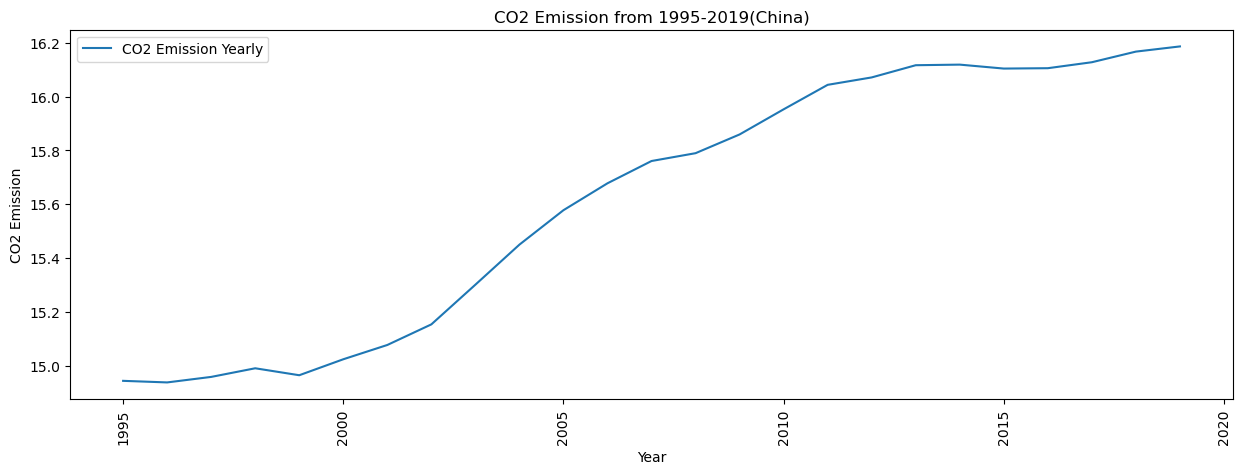

In [28]:
# line 1 points
x1 = co2_emission_china['year'].tolist()
y1 = np.log(co2_emission_china['value'].tolist())

plt.figure().set_figwidth(15)
# plotting the line 1 points 
plt.plot(x1, y1, label = "CO2 Emission Yearly")
  
# naming the x axis
plt.xlabel('Year')
# naming the y axis
plt.ylabel('CO2 Emission')
# giving a title to my graph
plt.title("CO2 Emission from 1995-2019(China)")
plt.xticks(rotation='vertical')
plt.savefig('co2_emission_plot_china.png', bbox_inches='tight')
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()

In [39]:
find_anomalies(co2_emission_china)

[]

In [30]:
china_power_plants = china_power_plants[['country_long','name', 'capacity_mw', 'primary_fuel', 'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014', 'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016', 'estimated_generation_gwh_2017']].copy()
for year in range(2013, 2018):
    china_power_plants[f'estimated_generation_gwh_{year}'] = china_power_plants[f'estimated_generation_gwh_{year}'].replace('', np.nan)

china_power_plants.dropna(inplace=True)
china_power_plants = china_power_plants.astype({'estimated_generation_gwh_2013': float, 'estimated_generation_gwh_2014': float, 'estimated_generation_gwh_2015': float, 'estimated_generation_gwh_2016': float, 'estimated_generation_gwh_2017': float})
china_power_plants

,country_long,name,capacity_mw,primary_fuel,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017
5075,China,Aba Minjiang River Jiangseba,128.0,Hydro,487.03,507.82,507.82,557.96,470.01
5077,China,Ahai,4750.0,Hydro,11167.63,19482.09,14239.04,15846.43,15625.61
5078,China,Aksai A,20.0,Solar,35.30,35.92,36.09,35.95,35.58
5079,China,Aksu 1,40.0,Solar,59.56,60.14,61.23,60.79,62.18
5080,China,Aksu A,40.0,Solar,59.15,60.08,61.25,60.79,61.60
...,...,...,...,...,...,...,...,...,...
9291,China,Zhuanjingzhen G,15.0,Solar,24.68,24.77,24.97,25.17,25.24
9298,China,Zhuozi Bayin,10.0,Solar,15.47,15.55,15.56,15.58,15.80
9302,China,Zhuxi County Chahe Hydro,7.0,Hydro,16.10,23.45,20.85,22.30,23.92
9305,China,Zipingpu,760.0,Hydro,2617.64,3109.06,3109.06,3368.52,3109.06


In [31]:
china_power_plant_count = china_power_plants['primary_fuel'].value_counts().reset_index().rename(columns={"index":"Primary Fuel", "primary_fuel":"Power Plants Count"})
china_power_plant_count

,Primary Fuel,Power Plants Count
0,Solar,1318
1,Hydro,945


In [32]:
temp_aggregate_by_generation_year = aggregate_by_year.query("2013 <= Year <= 2017")
co2_aggregate_by_generation_year = co2_emission_china.query("2013 <= year <= 2017")
temp_aggregate_by_generation_year.dtypes
# print(co2_aggregate_by_generation_year)

Year         int64
AvgTemp    float64
dtype: object

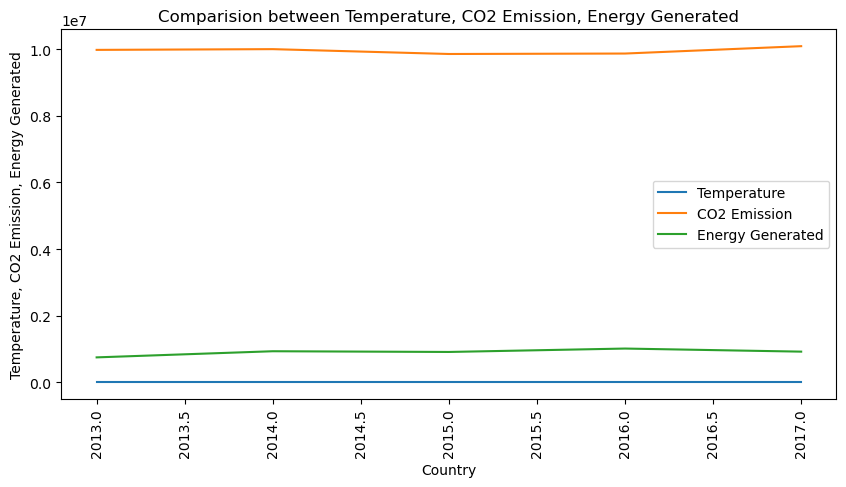

In [33]:
# line 1 points
x1 = temp_aggregate_by_generation_year['Year'].tolist()
y1 = temp_aggregate_by_generation_year['AvgTemp'].tolist()

plt.figure().set_figwidth(10)
# plotting the line 1 points 
plt.plot(x1, y1, label = "Temperature")
  
# line 2 points
x2 = temp_aggregate_by_generation_year['Year'].tolist()
y2 = co2_aggregate_by_generation_year['value'].tolist()
# plotting the line 2 points 
plt.plot(x2, y2, label = "CO2 Emission")

# line 3 points
x3 = temp_aggregate_by_generation_year['Year'].tolist()
y3 = [china_power_plants['estimated_generation_gwh_2013'].sum(), china_power_plants['estimated_generation_gwh_2014'].sum(), china_power_plants['estimated_generation_gwh_2015'].sum(), china_power_plants['estimated_generation_gwh_2016'].sum(), china_power_plants['estimated_generation_gwh_2017'].sum()]
# plotting the line 3 points 
plt.plot(x3, y3, label = "Energy Generated")
  
# naming the x axis
plt.xlabel('Country')
# naming the y axis
plt.ylabel('Temperature, CO2 Emission, Energy Generated')
# giving a title to my graph
plt.title('Comparision between Temperature, CO2 Emission, Energy Generated')
plt.xticks(rotation='vertical')
plt.savefig('temperature_co2_energy_generated_plot_china.png', bbox_inches='tight')
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()
# [china_power_plants['estimated_generation_gwh_2013'].sum(), china_power_plants['estimated_generation_gwh_2014'].sum(), china_power_plants['estimated_generation_gwh_2015'].sum(), china_power_plants['estimated_generation_gwh_2016'].sum(), china_power_plants['estimated_generation_gwh_2017'].sum()]